In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [92]:
df=pd.read_csv(r"E:\Susmita_Backup\Data Science Course\Data Science Assignment\Multilinear Regression\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [93]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [95]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


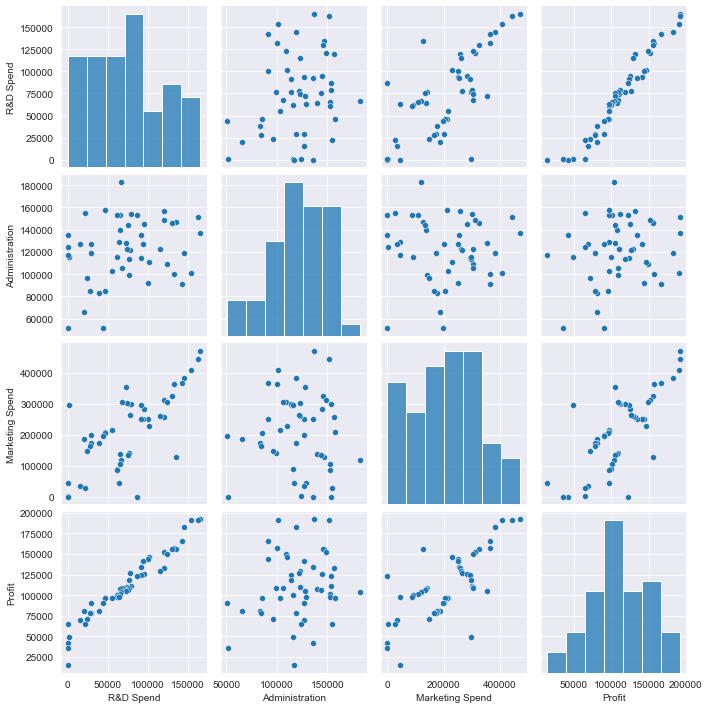

In [96]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [97]:
df1=df.rename({'R&D Spend':'RandD','Administration':'Admin','Marketing Spend':'Marketing'},axis=1)
df1.head()

,RandD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [98]:
df1.describe()

,RandD,Admin,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [99]:
model=smf.ols('Profit~RandD+Admin+Marketing',data=df1).fit()

In [100]:
(model.rsquared,model.aic)

(0.9507459940683246, 1058.7714985998055)

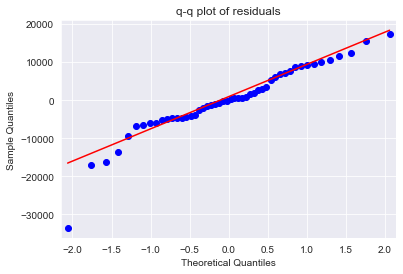

In [101]:
sm.qqplot(model.resid,line='q')
plt.title('q-q plot of residuals')
plt.show()

In [102]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [103]:
def get_standardized( vals ):
    return (vals-vals.mean())/vals.std()

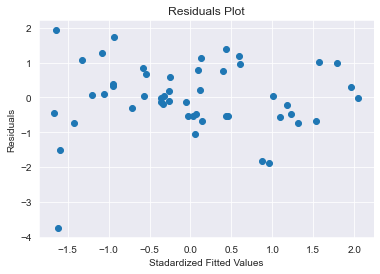

In [104]:
plt.scatter(get_standardized(model.fittedvalues),get_standardized(model.resid))
plt.title('Residuals Plot')
plt.xlabel('Stadardized Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [105]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

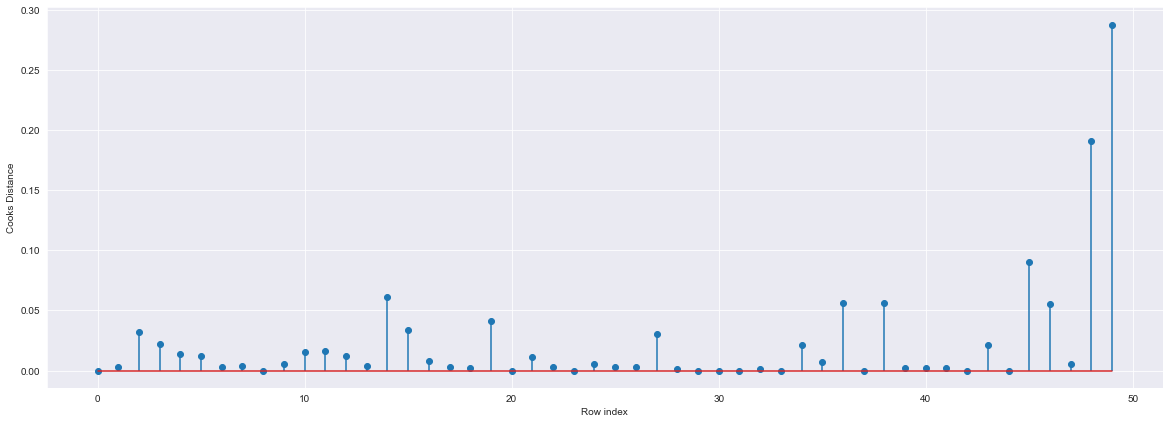

In [106]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [107]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

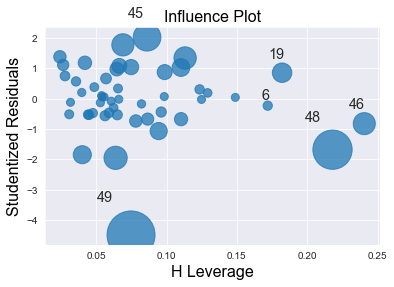

In [108]:
influence_plot(model)
plt.show()

In [110]:
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.36

In [81]:
#New data for prediction
newdata=({'RandD':73722,'Admin':121345,'Marketing':211025})
df2=pd.DataFrame(newdata, index=[1])
y=model.predict(df2)
print(y)

1    112012.936589
dtype: float64


In [87]:
y1=model.predict(df1)
y2=np.round(y1,2)
y2=pd.DataFrame(y2,columns=['Predicted Profit'])
y3=pd.merge(df1.reset_index(),y2.reset_index())
y3.drop('index',axis=1)

,RandD,Admin,Marketing,State,Profit,Predicted Profit
0,165349.20,136897.80,471784.10,New York,192261.83,192521.25
1,162597.70,151377.59,443898.53,California,191792.06,189156.77
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.28
3,144372.41,118671.85,383199.62,New York,182901.99,173696.70
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.51
5,131876.90,99814.71,362861.36,New York,156991.12,163580.78
6,134615.46,147198.87,127716.82,California,156122.51,158114.10
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.36
8,120542.52,148718.95,311613.29,New York,152211.77,151741.70
9,123334.88,108679.17,304981.62,California,149759.96,154884.68
